# An Exploration of NYC Crime Data

## Import Libraries

In [1]:
#import libraries that will be used for analysis
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
%matplotlib inline
import seaborn as sns

## Read Data

In [5]:
#Similar to read_csv, we can use read_json and pull in the Historical NYC arrest data
df = pd.read_json('https://data.cityofnewyork.us/resource/uip8-fykc.json')
df

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,...,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi
0,263187871,2023-02-07T00:00:00.000,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,...,951637,171141,40.636362,-74.117505,"{'type': 'Point', 'coordinates': [-74.117505, ...",4,1,13,74,10697.0
1,261368273,2023-01-04T00:00:00.000,NaN,(null),NaN,(null),RPA0076801,M,M,34,...,1004287,251338,40.856519,-73.927564,"{'type': 'Point', 'coordinates': [-73.927564, ...",47,4,39,22,13098.0
2,261667175,2023-01-10T00:00:00.000,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,...,1008754,238895,40.822355,-73.911463,"{'type': 'Point', 'coordinates': [-73.911463, ...",34,5,43,25,10929.0
3,264298625,2023-02-27T00:00:00.000,NaN,(null),NaN,(null),PL 2224000,F,Q,113,...,1039225,181937,40.665881,-73.801837,"{'type': 'Point', 'coordinates': [-73.80183654...",62,3,46,64,24339.0
4,261516485,2023-01-07T00:00:00.000,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,18,...,988210,218129,40.765390,-73.985702,"{'type': 'Point', 'coordinates': [-73.985702, ...",12,4,10,10,12081.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,262294001,2023-01-21T00:00:00.000,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,106,...,1039119,184568,40.673103,-73.802197,"{'type': 'Point', 'coordinates': [-73.802197, ...",62,3,46,64,24016.0
996,262089208,2023-01-18T00:00:00.000,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,75,...,1017119,183909,40.671404,-73.881509,"{'type': 'Point', 'coordinates': [-73.881509, ...",45,2,25,47,17215.0
997,261544944,2023-01-07T00:00:00.000,792.0,CRIMINAL POSSESSION WEAPON,118.0,DANGEROUS WEAPONS,PL 265031C,F,Q,105,...,1056927,192064,40.693550,-73.737918,"{'type': 'Point', 'coordinates': [-73.737918, ...",63,3,6,63,15311.0
998,262588323,2023-01-27T00:00:00.000,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,34,...,1006413,253762,40.863165,-73.919874,"{'type': 'Point', 'coordinates': [-73.91987408...",47,4,39,22,13092.0


## Clean Data

In [6]:
# Remove unknown data - consider data with "?" as unknown data - removing columns with unknown data
df.dropna(axis=1)

,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,263187871,2023-02-07T00:00:00.000,STRANGULATION 1ST,FELONY ASSAULT,PL 1211200,S,120,0,25-44,M,BLACK,951637,171141,40.636362,-74.117505,"{'type': 'Point', 'coordinates': [-74.117505, ...",4,1,13,74
1,261368273,2023-01-04T00:00:00.000,(null),(null),RPA0076801,M,34,0,25-44,F,BLACK,1004287,251338,40.856519,-73.927564,"{'type': 'Point', 'coordinates': [-73.927564, ...",47,4,39,22
2,261667175,2023-01-10T00:00:00.000,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,B,42,0,18-24,F,WHITE HISPANIC,1008754,238895,40.822355,-73.911463,"{'type': 'Point', 'coordinates': [-73.911463, ...",34,5,43,25
3,264298625,2023-02-27T00:00:00.000,(null),(null),PL 2224000,Q,113,0,25-44,M,BLACK,1039225,181937,40.665881,-73.801837,"{'type': 'Point', 'coordinates': [-73.80183654...",62,3,46,64
4,261516485,2023-01-07T00:00:00.000,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,PL 1601001,M,18,0,<18,M,BLACK,988210,218129,40.765390,-73.985702,"{'type': 'Point', 'coordinates': [-73.985702, ...",12,4,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,262294001,2023-01-21T00:00:00.000,STRANGULATION 1ST,FELONY ASSAULT,PL 1211200,Q,106,0,25-44,F,BLACK,1039119,184568,40.673103,-73.802197,"{'type': 'Point', 'coordinates': [-73.802197, ...",62,3,46,64
996,262089208,2023-01-18T00:00:00.000,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,PL 1200501,K,75,0,25-44,F,BLACK,1017119,183909,40.671404,-73.881509,"{'type': 'Point', 'coordinates': [-73.881509, ...",45,2,25,47
997,261544944,2023-01-07T00:00:00.000,CRIMINAL POSSESSION WEAPON,DANGEROUS WEAPONS,PL 265031C,Q,105,0,25-44,M,BLACK,1056927,192064,40.693550,-73.737918,"{'type': 'Point', 'coordinates': [-73.737918, ...",63,3,6,63
998,262588323,2023-01-27T00:00:00.000,"LARCENY,PETIT FROM OPEN AREAS,",PETIT LARCENY,PL 1552500,M,34,0,18-24,M,BLACK HISPANIC,1006413,253762,40.863165,-73.919874,"{'type': 'Point', 'coordinates': [-73.91987408...",47,4,39,22


In [7]:
# further filtered the data to keep just the columns we want to analyze and call the dataset df1
df1 = df[['arrest_key', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc','law_code', 'law_cat_cd','arrest_boro', 'arrest_precinct','age_group',
       'perp_sex', 'perp_race', 'x_coord_cd', 'y_coord_cd', 'latitude', 'longitude' ]]
df1

,arrest_key,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude
0,263187871,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,25-44,M,BLACK,951637,171141,40.636362,-74.117505
1,261368273,NaN,(null),NaN,(null),RPA0076801,M,M,34,25-44,F,BLACK,1004287,251338,40.856519,-73.927564
2,261667175,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,18-24,F,WHITE HISPANIC,1008754,238895,40.822355,-73.911463
3,264298625,NaN,(null),NaN,(null),PL 2224000,F,Q,113,25-44,M,BLACK,1039225,181937,40.665881,-73.801837
4,261516485,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,18,<18,M,BLACK,988210,218129,40.765390,-73.985702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,262294001,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,106,25-44,F,BLACK,1039119,184568,40.673103,-73.802197
996,262089208,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,75,25-44,F,BLACK,1017119,183909,40.671404,-73.881509
997,261544944,792.0,CRIMINAL POSSESSION WEAPON,118.0,DANGEROUS WEAPONS,PL 265031C,F,Q,105,25-44,M,BLACK,1056927,192064,40.693550,-73.737918
998,262588323,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,34,18-24,M,BLACK HISPANIC,1006413,253762,40.863165,-73.919874


## Descriptive Statistics

In [35]:
# How does the count of each category in Queens compare to the other boroughs in NYC?
df1.groupby(['arrest_boro','law_cat_cd'])['law_cat_cd'].count()

arrest_boro  law_cat_cd
B            F             112
             M             138
             V               1
K            F             118
             M             127
             V               3
M            F             100
             I               1
             M             131
Q            9               8
             F             102
             M             101
             V               1
S            F              25
             M              25
Name: law_cat_cd, dtype: int64

In [94]:
# Organize the data. Create the counts of each catgetory column and sort in descending order by borough
df1_r=df1.groupby(['arrest_boro','law_cat_cd'])['law_cat_cd'].count().reset_index(name='law_cat_cd_count')
df2=df1_r.sort_values(by=['arrest_boro','law_cat_cd_count'],ascending=[True,False],kind='mergesort')
df2

,arrest_boro,law_cat_cd,law_cat_cd_count
1,B,M,138
0,B,F,112
2,B,V,1
4,K,M,127
3,K,F,118
5,K,V,3
8,M,M,131
6,M,F,100
7,M,I,1
10,Q,F,102


In [97]:
#drop rows with unidentfied law category and violations, since counts are below 10
df2.drop(df2[df2['law_cat_cd_count']<10].index, inplace=True)
df2

,arrest_boro,law_cat_cd,law_cat_cd_count
1,B,M,138
0,B,F,112
4,K,M,127
3,K,F,118
8,M,M,131
6,M,F,100
10,Q,F,102
11,Q,M,101
13,S,F,25
14,S,M,25


## Visualization

Text(0.5, 0, 'NYC Borough')

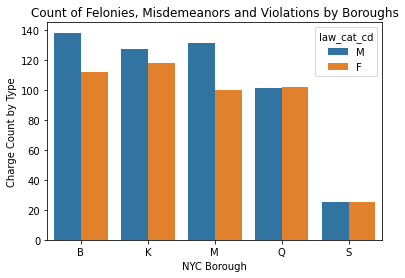

In [98]:
#bar plot the data
sns.barplot(x='arrest_boro', y='law_cat_cd_count', hue='law_cat_cd', data=df2)
#Add a title to the visualization
plt.title("Count of Felonies and Misdemeanors by Boroughs")
#Adjust the label of the y-axis 
plt.ylabel("Charge Count by Type") 
#Adjust the label of the x-axis 
plt.xlabel("NYC Borough")

## Conclusion

### Queens is 4th of the 5 boroughs with the most amount of arrests that were charged as a felony or misdeneanor.  Queens and Staten Island were the only boroughs that have similar counts of felonies or misdemeanors